In [20]:
import numpy as np
from classy import Class
import matplotlib.pyplot as plt

In [21]:
import pickle
def save_pickle(dat, filename, **kwargs):
    file = open(filename,'wb')
    pickle.dump(dat, file)
    file.close()
    
def load_pickle(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin,  )


In [22]:
summary = np.load('../euclid_flagship_simulations/flagship_like_summary_stat_DES_MoR_Mwl_scatter_model_Gamma0.7_gaussian_lensing_variable_Mwl.npy', allow_pickle=True).item()

In [23]:
np.mean(summary['mean_log10m200b'])

14.52076241869124

In [24]:
np.sum(summary['count_with_m200b_def'])

93595.0

In [26]:
data = load_pickle('../../capish_sbi_data/config_sbi_DESlike6_corrected_standard_prior_6_params/simulations.pkl')

In [27]:
count = np.sum(np.sum(data['x'][0], axis=1), axis=1)
mean_mass = np.mean(np.mean(data['x'][1],axis=1), axis=1)

Text(0, 0.5, '$\\sigma_8$')

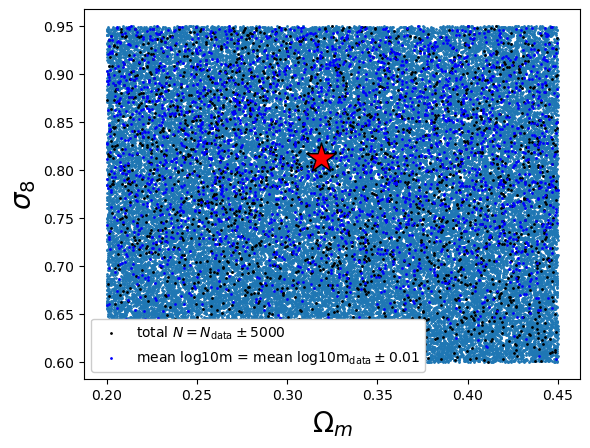

In [28]:
#plt.scatter(data['failed_theta'][:,0], data['failed_theta'][:,1])
count = np.sum(np.sum(data['x'][0], axis=1), axis=1)
plt.scatter(data['theta'][:,0], data['theta'][:,1],s=1)
mask = (count > 0)
#plt.scatter(data['theta'][:,0][mask], data['theta'][:,1][mask],s=3, c=np.log10(count[mask]), cmap='rainbow')
#plt.colorbar(label='total count per simulation')

mask = (count>90000)*(count<100000)
plt.scatter(data['theta'][:,0][mask], data['theta'][:,1][mask],s=1, c='k', label=r'total $N = N_{\rm data} \pm 5000$')

mask = (mean_mass>14.5)*(mean_mass<14.53)
plt.scatter(data['theta'][:,0][mask], data['theta'][:,1][mask],s=1, c='b', label=r'mean log10m = mean log10m$_{\rm data} \pm 0.01$')

plt.scatter([0.319], [0.813], s=500, marker = '*',color = 'r', edgecolors='k')
plt.legend(framealpha=1)
plt.xlabel(r'$\Omega_m$', fontsize=20)
plt.ylabel(r'$\sigma_8$', fontsize=20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


49993


Text(0, 0.5, '$\\sigma_8$')

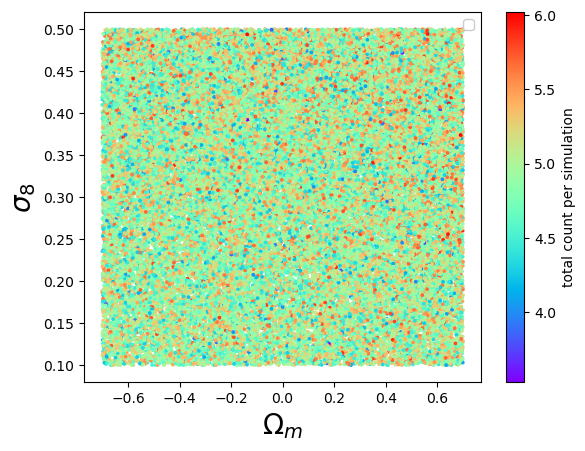

In [56]:
#plt.scatter(data['failed_theta'][:,0], data['failed_theta'][:,1])
count = data['x'][0]

mask = []
for i in range(len(count)):
    x = count[i]
    x = np.sum(x==0)
    if x >= 1: mask.append(False)
    else: mask.append(True)
mask = np.array(mask)
print(np.sum(mask))

N = np.sum(np.sum(count, axis=1), axis=1)

#plt.scatter(data['theta'][:,0], data['theta'][:,1],s=1)
plt.scatter(data['theta'][:,4][mask], data['theta'][:,5][mask],s=3, c=np.log10(N[mask]), cmap='rainbow')

#plt.scatter(data['theta'][:,0][np.invert(mask)], data['theta'][:,1][np.invert(mask)],s=3, c='k')
plt.colorbar(label='total count per simulation')


plt.legend(framealpha=1)
plt.xlabel(r'$\Omega_m$', fontsize=20)
plt.ylabel(r'$\sigma_8$', fontsize=20)

In [29]:
data = load_pickle('../../capish_sbi_data/config_sbi_DES_MoR_log10Mwl_individual_scatter_narrow_prior_1_param/simulations.pkl')
count = data['x'][0]

FileNotFoundError: [Errno 2] No such file or directory: '../../capish_sbi_data/config_sbi_DES_MoR_log10Mwl_individual_scatter_narrow_prior_1_param/simulations.pkl'

In [12]:
log10mass = data['x'][1]

In [13]:
z_bin=4
rich_bin=5

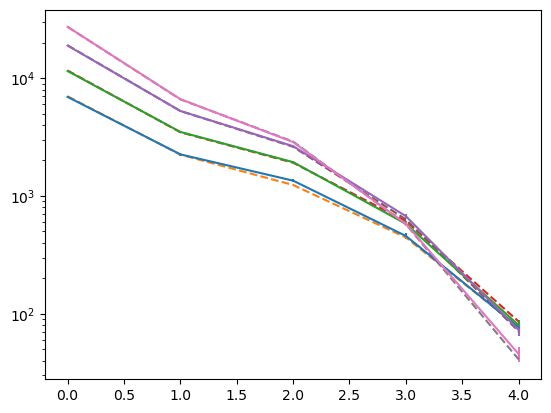

In [14]:
x = np.arange(len(np.mean(count, axis=0)))
for i in range(z_bin):
    plt.errorbar(x, np.mean(count, axis=0)[:,i], np.std(count, axis=0)[:,i])
    plt.plot(x, summary['count_with_m200b_def'][:,i], '--')
plt.yscale('log')

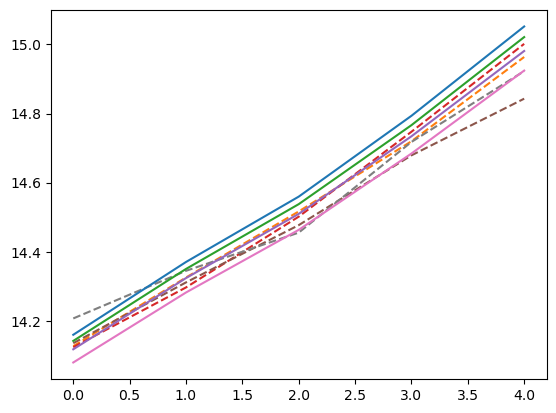

In [19]:
x = np.arange(len(np.mean(count, axis=0)))
for i in range(z_bin):
    plt.errorbar(x, np.mean(log10mass, axis=0)[:,i],)
    plt.plot(x,  summary['mean_log10m200b'][:,i], '--')
